In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### This is womens's clothing e-commerce reviews dataset . Each row corresponds to a customer review, and includes the variables:

#### Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
#### Age: Positive Integer variable of the reviewers age.
#### Title: String variable for the title of the review.
#### Review Text: String variable for the review body.
#### Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
#### Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
#### Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
#### Division Name: Categorical name of the product high level division.
#### Department Name: Categorical name of the product department name.
#### Class Name: Categorical name of the product class name.

In [2]:
# Display maximun columns.
pd.set_option('Display.max_columns',None)
# Display maximum rows.
pd.set_option('Display.max_rows',None)

In [3]:
# Reading dataset.
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [4]:
# Checking first 5 rows of dataset.
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [5]:
# Removing the useless column
df = df.drop('Unnamed: 0', axis = 1)

In [6]:
# Checking first 5 rows of dataset.
df.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [7]:
# Checking shape of the dataset.
df.shape

(23486, 10)

In [8]:
# Checking size of the dataset.
df.size

234860

In [9]:
# Checking information of dataset. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [10]:
# Checking 5 point summary of dataset.
# It will consider only numerical columns.
df.describe().T

count        mean         std   min    25%    50%  \
Clothing ID              23486.0  918.118709  203.298980   0.0  861.0  936.0   
Age                      23486.0   43.198544   12.279544  18.0   34.0   41.0   
Rating                   23486.0    4.196032    1.110031   1.0    4.0    5.0   
Recommended IND          23486.0    0.822362    0.382216   0.0    1.0    1.0   
Positive Feedback Count  23486.0    2.535936    5.702202   0.0    0.0    1.0   

                            75%     max  
Clothing ID              1078.0  1205.0  
Age                        52.0    99.0  
Rating                      5.0     5.0  
Recommended IND             1.0     1.0  
Positive Feedback Count     3.0   122.0

In [11]:
# Checking summary of non-numeric columns.
df.describe(include = 'object').T

count unique  \
Title            19676  13993   
Review Text      22641  22634   
Division Name    23472      3   
Department Name  23472      6   
Class Name       23472     20   

                                                               top   freq  
Title                                                     Love it!    136  
Review Text      Perfect fit and i've gotten so many compliment...      3  
Division Name                                              General  13850  
Department Name                                               Tops  10468  
Class Name                                                 Dresses   6319

In [12]:
# Checking for null values in the dataset.
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [13]:
# Checking number of unique content in each column.
df.nunique(axis = 0)

Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [14]:
# Checking correlation between numerical columns.
df.corr()

Clothing ID       Age    Rating  Recommended IND  \
Clothing ID                 1.000000  0.017972 -0.018879        -0.016206   
Age                         0.017972  1.000000  0.026831         0.030622   
Rating                     -0.018879  0.026831  1.000000         0.792336   
Recommended IND            -0.016206  0.030622  0.792336         1.000000   
Positive Feedback Count     0.046356  0.043079 -0.064961        -0.069045   

                         Positive Feedback Count  
Clothing ID                             0.046356  
Age                                     0.043079  
Rating                                 -0.064961  
Recommended IND                        -0.069045  
Positive Feedback Count                 1.000000

#### There is a strong positive correlation between the Rating and Recommended IND.

In [15]:
# Replacing null values with empty space.
df['Title'] = df['Title'].replace({np.nan : ''})

In [16]:
# Checking for null values in the column.
df['Title'][df['Title'] == np.nan]

Series([], Name: Title, dtype: object)

In [17]:
# Replacing null values with the empty space.
df['Review Text'] = df['Review Text'].replace({np.nan : ''})

In [18]:
# Checking for null values in the column.
df['Review Text'][df['Review Text'] == np.nan]

Series([], Name: Review Text, dtype: object)

In [19]:
# Creating new column 'Review'
df['Review'] = df['Title'] + ' ' + df['Review Text']

In [20]:
# Checking the dataset with new column
df.head()

Clothing ID  Age                    Title  \
0          767   33                            
1         1080   34                            
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                        0       Initmates        Intimate  Intimates   
1                        4         General         Dresses    Dresses   
2                        0         General         Dresses    Dresses   
3                        0  General Petite         Bottoms      Pants   
4                        6         General            Tops    Blouses   

                                              Review  
0   Absolutely wonderful - silky and sexy and com...  
1   Love this dress!  it's sooo pretty.  i happen...  
2  Some major design flaws I had such high hopes ...  
3  My favorite buy! I love, love, love this jumps...  
4  Flattering shirt This shirt is very flattering...

In [21]:
# Checking for number of empty spaces in the new column.
df['Review'][df['Review'] == ' ']

92        
93        
98        
135       
142       
165       
168       
192       
201       
248       
265       
298       
323       
342       
345       
400       
425       
455       
493       
519       
523       
527       
536       
542       
554       
562       
571       
574       
580       
611       
686       
707       
728       
732       
737       
753       
758       
797       
805       
892       
893       
974       
1004      
1030      
1046      
1201      
1298      
1315      
1344      
1366      
1425      
1454      
1471      
1485      
1534      
1562      
1573      
1582      
1611      
1643      
1660      
1703      
1717      
1720      
1764      
1817      
1835      
1928      
2063      
2081      
2103      
2149      
2160      
2174      
2219      
2242      
2251      
2313      
2323      
2362      
2387      
2410      
2412      
2466      
2468      
2487      
2519      
2520      
2560      
2571      
2739      

In [22]:
# Replacing the spaces present in the new column with null value.
df['Review'] = df['Review'].replace({' ' : np.nan})

In [23]:
# Checking for number of null vallues in the new column.
df['Review'].isnull().sum()

844

In [24]:
# Dropping the 'Title' and 'Review Text' columns.
df = df.drop(['Title','Review Text'], axis = 1)

In [25]:
# Checking the dataset
df.head()

Clothing ID  Age  Rating  Recommended IND  Positive Feedback Count  \
0          767   33       4                1                        0   
1         1080   34       5                1                        4   
2         1077   60       3                0                        0   
3         1049   50       5                1                        0   
4          847   47       5                1                        6   

    Division Name Department Name Class Name  \
0       Initmates        Intimate  Intimates   
1         General         Dresses    Dresses   
2         General         Dresses    Dresses   
3  General Petite         Bottoms      Pants   
4         General            Tops    Blouses   

                                              Review  
0   Absolutely wonderful - silky and sexy and com...  
1   Love this dress!  it's sooo pretty.  i happen...  
2  Some major design flaws I had such high hopes ...  
3  My favorite buy! I love, love, love this jumps...  
4  Flattering shirt This shirt is very flattering...

In [26]:
# Checking shape of the dataset.
df.shape

(23486, 9)

In [27]:
# Checking the total null values.
df.isnull().sum()

Clothing ID                  0
Age                          0
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
Review                     844
dtype: int64

In [28]:
# Dropping the rows which contains null values in Review column.
df = df.dropna(subset = ['Review'])

In [29]:
# Checking for null values in dataset.
df.isnull().sum()

Clothing ID                 0
Age                         0
Rating                      0
Recommended IND             0
Positive Feedback Count     0
Division Name              13
Department Name            13
Class Name                 13
Review                      0
dtype: int64

In [30]:
# Dropping rows which contains null values in the 'Division Name' column.
df = df.dropna(subset = ['Division Name'])

In [31]:
# Checking for null values in dataset.
df.isna().sum()

Clothing ID                0
Age                        0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Review                     0
dtype: int64

In [32]:
# Checking shape of the dataset after dropping the rows with null values.
df.shape

(22629, 9)

### Text Processing.

In [33]:
# Checking the first five rows of data.
df.head()

Clothing ID  Age  Rating  Recommended IND  Positive Feedback Count  \
0          767   33       4                1                        0   
1         1080   34       5                1                        4   
2         1077   60       3                0                        0   
3         1049   50       5                1                        0   
4          847   47       5                1                        6   

    Division Name Department Name Class Name  \
0       Initmates        Intimate  Intimates   
1         General         Dresses    Dresses   
2         General         Dresses    Dresses   
3  General Petite         Bottoms      Pants   
4         General            Tops    Blouses   

                                              Review  
0   Absolutely wonderful - silky and sexy and com...  
1   Love this dress!  it's sooo pretty.  i happen...  
2  Some major design flaws I had such high hopes ...  
3  My favorite buy! I love, love, love this jumps...  
4  Flattering shirt This shirt is very flattering...

In [34]:
# Checking the first five rows of the Review column.
df['Review'].head()

0     Absolutely wonderful - silky and sexy and com...
1     Love this dress!  it's sooo pretty.  i happen...
2    Some major design flaws I had such high hopes ...
3    My favorite buy! I love, love, love this jumps...
4    Flattering shirt This shirt is very flattering...
Name: Review, dtype: object

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
# Creating the instance of the function with parameter to remove stop words.
cv = CountVectorizer(stop_words = 'english')

# Fitting the function.
vec = cv.fit(df['Review'])

In [37]:
# Transforming the Review with function.
bag_of_words = vec.transform(df['Review'])

# It shows (row index(Review), column index(word))  count
print(bag_of_words)

# Checking shape (rows , columns).
bag_of_words.shape

  (0, 582)	1
  (0, 2900)	1
  (0, 11083)	1
  (0, 11338)	1
  (0, 14144)	1
  (1, 1485)	2
  (1, 1912)	1
  (1, 3671)	1
  (1, 3839)	1
  (1, 4185)	1
  (1, 5633)	1
  (1, 5949)	1
  (1, 6162)	1
  (1, 6930)	1
  (1, 7019)	1
  (1, 7256)	1
  (1, 7412)	1
  (1, 7542)	2
  (1, 7977)	1
  (1, 8694)	1
  (1, 8763)	1
  (1, 9231)	3
  (1, 9698)	1
  (1, 11717)	1
  (1, 12071)	1
  :	:
  (22627, 9181)	1
  (22627, 11270)	1
  (22627, 11815)	1
  (22627, 12310)	2
  (22627, 12540)	1
  (22627, 12549)	1
  (22627, 13424)	1
  (22627, 13781)	1
  (22627, 13818)	1
  (22627, 13884)	1
  (22627, 13918)	1
  (22627, 14200)	1
  (22628, 2909)	1
  (22628, 4185)	1
  (22628, 4316)	1
  (22628, 4971)	1
  (22628, 5066)	1
  (22628, 6125)	1
  (22628, 7334)	1
  (22628, 7553)	1
  (22628, 7683)	1
  (22628, 9181)	1
  (22628, 9406)	1
  (22628, 10148)	1
  (22628, 13894)	1


(22629, 14388)

In [38]:
# Returns vector that contains sum of each word occuring in the Review column.

sum_words = bag_of_words.sum(axis=0)
sum_words

matrix([[93,  2, 65, ...,  1,  1,  1]], dtype=int64)

In [39]:
# Gives the dictionary of the {word : word column index} pairs. 

vec.vocabulary_

{'absolutely': 582,
 'wonderful': 14144,
 'silky': 11338,
 'sexy': 11083,
 'comfortable': 2900,
 'love': 7542,
 'dress': 4185,
 'sooo': 11717,
 'pretty': 9698,
 'happened': 5949,
 'store': 12071,
 'glad': 5633,
 'did': 3839,
 'bc': 1485,
 'ordered': 8763,
 'online': 8694,
 'petite': 9231,
 'bought': 1912,
 'length': 7256,
 'hits': 6162,
 'just': 6930,
 'little': 7412,
 'knee': 7019,
 'definitely': 3671,
 'true': 13154,
 'midi': 7977,
 'truly': 13156,
 'major': 7679,
 'design': 3771,
 'flaws': 5140,
 'high': 6115,
 'hopes': 6233,
 'really': 10096,
 'wanted': 13818,
 'work': 14169,
 'initially': 6587,
 'small': 11568,
 'usual': 13583,
 'size': 11398,
 'outrageously': 8828,
 'fact': 4813,
 'zip': 14368,
 'reordered': 10332,
 'medium': 7881,
 'ok': 8673,
 'overall': 8847,
 'half': 5900,
 'fit': 5064,
 'nicely': 8444,
 'tight': 12881,
 'layer': 7176,
 'somewhat': 11709,
 'cheap': 2508,
 'net': 8417,
 'layers': 7180,
 'imo': 6439,
 'flaw': 5136,
 'sewn': 11078,
 'directly': 3907,
 'zipper': 

In [40]:
# Retrieving the word and its count of occurence in the whole text column.
 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq

[('absolutely', 864),
 ('wonderful', 354),
 ('silky', 132),
 ('sexy', 269),
 ('comfortable', 3531),
 ('love', 10812),
 ('dress', 12221),
 ('sooo', 57),
 ('pretty', 2865),
 ('happened', 72),
 ('store', 2034),
 ('glad', 623),
 ('did', 1713),
 ('bc', 78),
 ('ordered', 3860),
 ('online', 1617),
 ('petite', 2441),
 ('bought', 3018),
 ('length', 2725),
 ('hits', 438),
 ('just', 5830),
 ('little', 3926),
 ('knee', 467),
 ('definitely', 1358),
 ('true', 1741),
 ('midi', 78),
 ('truly', 184),
 ('major', 41),
 ('design', 1736),
 ('flaws', 98),
 ('high', 1229),
 ('hopes', 109),
 ('really', 4073),
 ('wanted', 1209),
 ('work', 2288),
 ('initially', 88),
 ('small', 5066),
 ('usual', 887),
 ('size', 8974),
 ('outrageously', 2),
 ('fact', 218),
 ('zip', 172),
 ('reordered', 28),
 ('medium', 2285),
 ('ok', 275),
 ('overall', 841),
 ('half', 221),
 ('fit', 7935),
 ('nicely', 811),
 ('tight', 1504),
 ('layer', 361),
 ('somewhat', 194),
 ('cheap', 370),
 ('net', 5),
 ('layers', 116),
 ('imo', 38),
 ('flaw

In [41]:
# Sorting the word_freq in descending order of there occurence.

words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
words_freq

[('dress', 12221),
 ('love', 10812),
 ('size', 8974),
 ('fit', 7935),
 ('great', 7905),
 ('like', 7386),
 ('wear', 6551),
 ('just', 5830),
 ('fabric', 5081),
 ('small', 5066),
 ('color', 4915),
 ('cute', 4595),
 ('perfect', 4588),
 ('beautiful', 4372),
 ('look', 4147),
 ('really', 4073),
 ('flattering', 4025),
 ('little', 3926),
 ('ordered', 3860),
 ('soft', 3773),
 ('nice', 3551),
 ('comfortable', 3531),
 ('shirt', 3171),
 ('large', 3117),
 ('bought', 3018),
 ('sweater', 2975),
 ('looks', 2970),
 ('bit', 2939),
 ('fits', 2929),
 ('material', 2872),
 ('pretty', 2865),
 ('length', 2725),
 ('jeans', 2616),
 ('long', 2611),
 ('quality', 2591),
 ('colors', 2533),
 ('petite', 2441),
 ('got', 2432),
 ('waist', 2399),
 ('work', 2288),
 ('medium', 2285),
 ('skirt', 2238),
 ('retailer', 2223),
 ('xs', 2221),
 ('think', 2197),
 ('pants', 2181),
 ('runs', 2174),
 ('good', 2153),
 ('big', 2095),
 ('short', 2095),
 ('tried', 2090),
 ('super', 2059),
 ('store', 2034),
 ('usually', 2008),
 ('summer',

In [42]:
# Defining the function to check top n most used words.

def get_top_n_words(column, n):
    
    cv = CountVectorizer()
    vec = cv.fit(column)
    bag_of_words = vec.transform(column)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse = True)
    return words_freq[:n]

In [43]:
# Passing our parameter to the function.

# Checking top 20 most used words.
get_top_n_words(df['Review'], 20)

[('the', 77206),
 ('and', 50834),
 ('it', 50022),
 ('is', 30983),
 ('this', 26689),
 ('to', 25153),
 ('in', 21312),
 ('but', 18123),
 ('on', 15676),
 ('for', 15108),
 ('of', 13692),
 ('with', 13099),
 ('so', 12695),
 ('was', 12292),
 ('dress', 12221),
 ('my', 11285),
 ('love', 10812),
 ('not', 10788),
 ('that', 10068),
 ('size', 8974)]

#### These are the top 20 most used words in our reviews, without removing the stop words.

In [44]:
# Same above function with stop words removal.

def s_get_top_n_words(column, n):
    
    cvs = CountVectorizer(stop_words = 'english')
    vecs = cvs.fit(column)
    sbag_of_words = vecs.transform(column)
    ssum_words = sbag_of_words.sum(axis = 0)
    swords_freq = [(word, sum_words[0, idx]) for word, idx in vecs.vocabulary_.items()]
    swords_freq = sorted(words_freq, key = lambda x : x[1], reverse = True)
    return swords_freq[:n]

In [45]:
# Passing our parameter to the function.

# Check top 20 most used words after removing stop words.
s_get_top_n_words(df['Review'], 20)

[('dress', 12221),
 ('love', 10812),
 ('size', 8974),
 ('fit', 7935),
 ('great', 7905),
 ('like', 7386),
 ('wear', 6551),
 ('just', 5830),
 ('fabric', 5081),
 ('small', 5066),
 ('color', 4915),
 ('cute', 4595),
 ('perfect', 4588),
 ('beautiful', 4372),
 ('look', 4147),
 ('really', 4073),
 ('flattering', 4025),
 ('little', 3926),
 ('ordered', 3860),
 ('soft', 3773)]

In [46]:
print(vec.stop_words_)

set()


#### These are the top 20 most used words after removing the stop words.

#### As we compare the top 20 most used words in our review, before and after removing the stop words; there are only three words which are common in both. which means most of the stop words has been removed.   

### WordCloud.

#### With Recommended IND == 0.

In [47]:
!pip install wordcloud

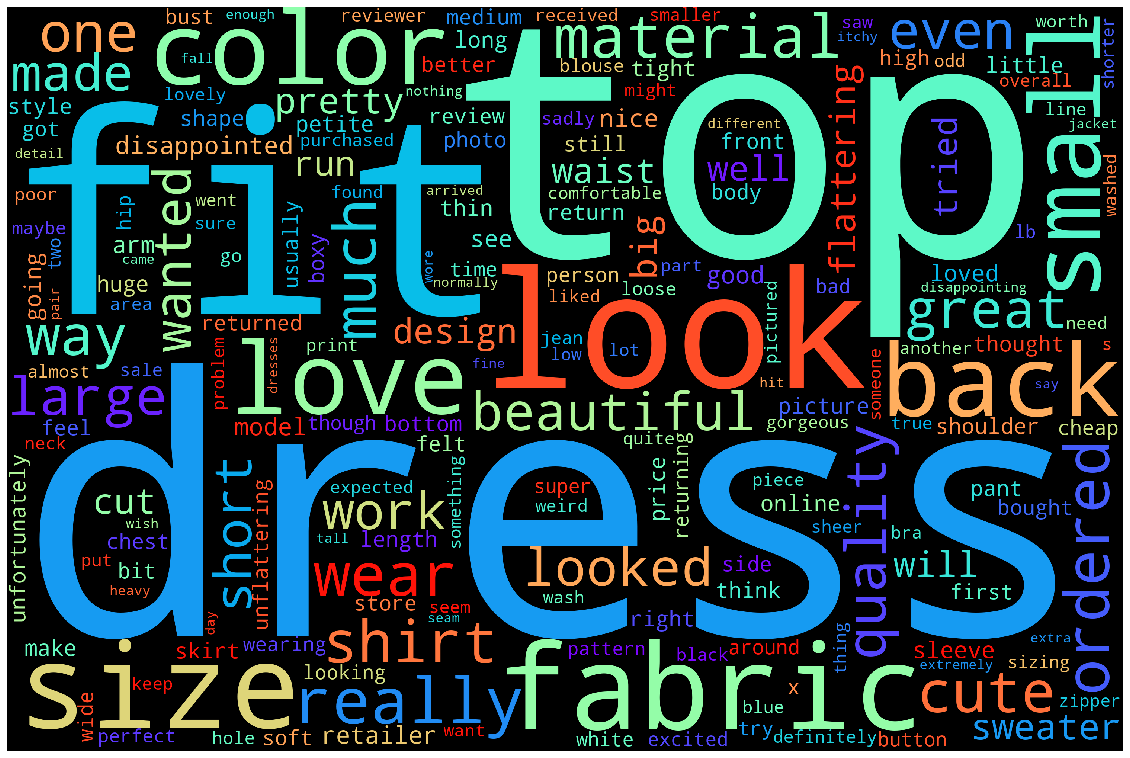

In [48]:
# Creating Wordcloud to get the understanding of frequently used words in Reviews.
from wordcloud import WordCloud, STOPWORDS

# Visualize the frequently used words in reviews for the product which customer has not recommended.
text = ' '.join(df['Review'][df['Recommended IND'] == 0])

# WordCloud function.
# widhth and height are the parameters for the size of the wordcloud.
# background_color and colormap parameters are for the different color options for the wordcloud.
# collocations is set false, so as to avoid the duplication of the similar words like 'very', 'good' and 'very good'.
# stopwords will remove the unimportant or least useful words for analysis like 'we', 'are', 'the', 'is', etc.
# max_words : we can set the number of words to be displayed in a wordcloud. 
wordcloud = WordCloud(width = 3000, height = 2000, random_state = 1, background_color = 'black', colormap = 'rainbow',
                     collocations = False, stopwords = STOPWORDS, max_words = 200).generate(text)

plt.figure(figsize = (20,18))
plt.imshow(wordcloud)
# This axis('off') will not show the axis.
plt.axis('off')
plt.show()

#### Above is the wordcloud for the Review of the customer who has not recommended the product.

#### The most used words which we can see are : dress, top, fit, look, size, fabric, color, love, small, back, etc.

#### With Recommended IND == 1.

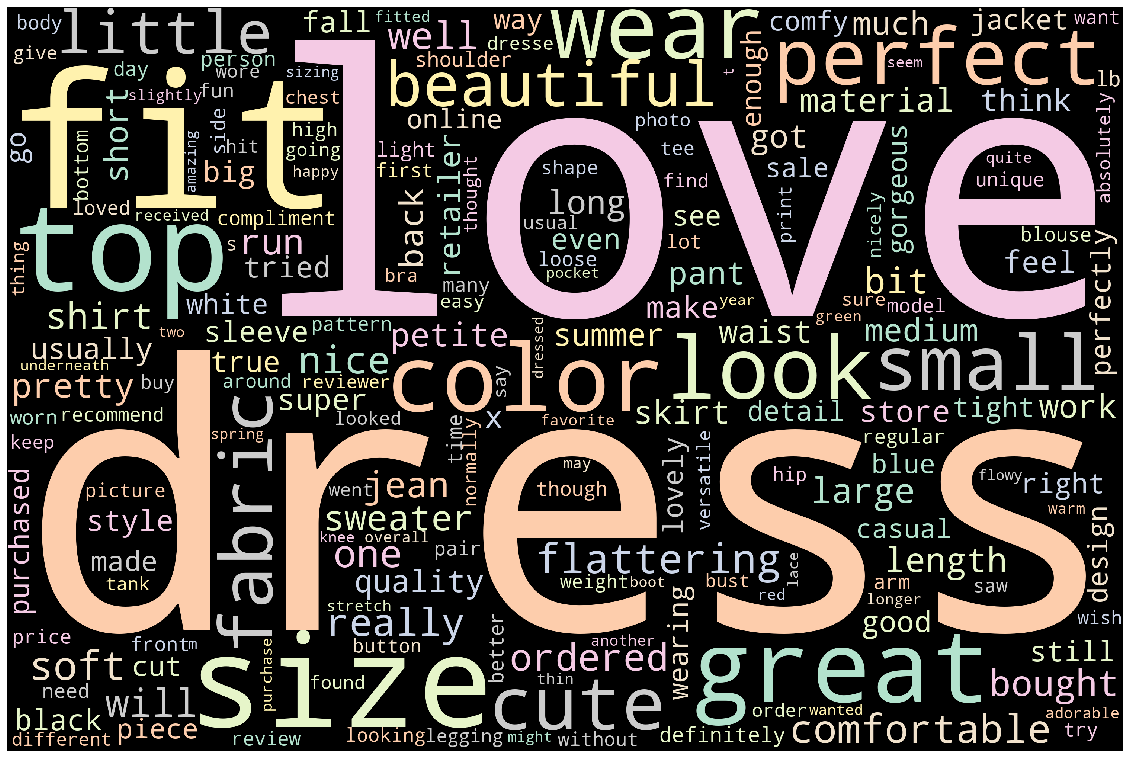

In [49]:
# Visualize the most frequently used words in the review of the product which customer has recommended.
text = ' '.join(df['Review'][df['Recommended IND'] == 1])

# WordCloud function.
# widhth and height are the parameters for the size of the wordcloud.
# background_color and colormap parameters are for the different color options for the wordcloud.
# collocations is set false, so as to avoid the duplication of the similar words like 'very', 'good' and 'very good'.
# stopwords will remove the unimportant or least useful words for analysis like 'we', 'are', 'the', 'is', etc.
# max_words : we can set the number of words to be displayed in a wordcloud.
wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'black', colormap = 'Pastel2', random_state = 1,
                     collocations = False, stopwords = STOPWORDS, max_words = 200).generate(text)

plt.figure(figsize = (20,18))
plt.imshow(wordcloud)
# This axis('off') will not show the axis.
plt.axis('off')
plt.show()

#### Above is the wordcloud for the Review of the customer who has recommended the product.

#### The most useful words which we can see are : love, dress, fit, size, great, top, perfect, color, look, fabric, wear, etc.

### DTM - Document Term Matrix.

In [50]:
# bag of words after removing stop words.
print(bag_of_words)

  (0, 582)	1
  (0, 2900)	1
  (0, 11083)	1
  (0, 11338)	1
  (0, 14144)	1
  (1, 1485)	2
  (1, 1912)	1
  (1, 3671)	1
  (1, 3839)	1
  (1, 4185)	1
  (1, 5633)	1
  (1, 5949)	1
  (1, 6162)	1
  (1, 6930)	1
  (1, 7019)	1
  (1, 7256)	1
  (1, 7412)	1
  (1, 7542)	2
  (1, 7977)	1
  (1, 8694)	1
  (1, 8763)	1
  (1, 9231)	3
  (1, 9698)	1
  (1, 11717)	1
  (1, 12071)	1
  :	:
  (22627, 9181)	1
  (22627, 11270)	1
  (22627, 11815)	1
  (22627, 12310)	2
  (22627, 12540)	1
  (22627, 12549)	1
  (22627, 13424)	1
  (22627, 13781)	1
  (22627, 13818)	1
  (22627, 13884)	1
  (22627, 13918)	1
  (22627, 14200)	1
  (22628, 2909)	1
  (22628, 4185)	1
  (22628, 4316)	1
  (22628, 4971)	1
  (22628, 5066)	1
  (22628, 6125)	1
  (22628, 7334)	1
  (22628, 7553)	1
  (22628, 7683)	1
  (22628, 9181)	1
  (22628, 9406)	1
  (22628, 10148)	1
  (22628, 13894)	1


In [51]:
vec.get_feature_names()

['00',
 '000',
 '00p',
 '02',
 '03',
 '03dd',
 '04',
 '06',
 '0dd',
 '0in',
 '0p',
 '0petite',
 '0r',
 '0verall',
 '0xs',
 '10',
 '100',
 '1000',
 '100lb',
 '100lbs',
 '101',
 '102',
 '102lbs',
 '103',
 '103lb',
 '103lbs',
 '104',
 '104lbs',
 '105',
 '105lb',
 '105lbs',
 '106',
 '106lbs',
 '107',
 '107lb',
 '107lbs',
 '107pound',
 '108',
 '108lbs',
 '109',
 '109lbs',
 '10l',
 '10lbs',
 '10mths',
 '10p',
 '10s',
 '10th',
 '10x',
 '11',
 '110',
 '110lb',
 '110lbs',
 '111',
 '111lbs',
 '112',
 '112lb',
 '112lbs',
 '112llbs',
 '113',
 '113lbs',
 '114',
 '114lb',
 '114lbs',
 '115',
 '115ish',
 '115lb',
 '115lbs',
 '115llbs',
 '116',
 '116bs',
 '116ibs',
 '116lb',
 '116lbs',
 '117',
 '117bl',
 '117lbs',
 '118',
 '118lb',
 '118lbs',
 '119',
 '11and',
 '11in',
 '11inches',
 '12',
 '120',
 '120lb',
 '120lbs',
 '121',
 '122',
 '122lb',
 '122lbs',
 '123',
 '123lb',
 '123lbs',
 '123lbssize',
 '124',
 '124lb',
 '124lbs',
 '125',
 '125b',
 '125ibs',
 '125ish',
 '125lb',
 '125lbs',
 '126',
 '126lbs',

In [52]:
# import re
# a=[]
# for word in vec.get_feature_names():
#     if re.match('[0-9]',word).pos ==0:
#         a.append(word)
    

In [53]:
# len(a)

In [54]:
# (pd.Series(vec.get_feature_names())==

In [55]:
# s='bc'

# #re.match('[0-9]',s).pos==0
# re.match('[0-9]',s).endpos

In [56]:
dtm = pd.DataFrame(bag_of_words.toarray(), columns = vec.get_feature_names())
dtm.head()

00  000  00p  02  03  03dd  04  06  0dd  0in  0p  0petite  0r  0verall  \
0   0    0    0   0   0     0   0   0    0    0   0        0   0        0   
1   0    0    0   0   0     0   0   0    0    0   0        0   0        0   
2   0    0    0   0   0     0   0   0    0    0   0        0   0        0   
3   0    0    0   0   0     0   0   0    0    0   0        0   0        0   
4   0    0    0   0   0     0   0   0    0    0   0        0   0        0   

   0xs  10  100  1000  100lb  100lbs  101  102  102lbs  103  103lb  103lbs  \
0    0   0    0     0      0       0    0    0       0    0      0       0   
1    0   0    0     0      0       0    0    0       0    0      0       0   
2    0   0    0     0      0       0    0    0       0    0      0       0   
3    0   0    0     0      0       0    0    0       0    0      0       0   
4    0   0    0     0      0       0    0    0       0    0      0       0   

   104  104lbs  105  105lb  105lbs  106  106lbs  107  107lb  107lbs  107pound  \
0    0       0    0      0       0    0       0    0      0       0         0   
1    0       0    0      0       0    0       0    0      0       0         0   
2    0       0    0      0       0    0       0    0      0       0         0   
3    0       0    0      0       0    0       0    0      0       0         0   
4    0       0    0      0       0    0       0    0      0       0         0   

   108  108lbs  109  109lbs  10l  10lbs  10mths  10p  10s  10th  10x  11  110  \
0    0       0    0       0    0      0       0    0    0     0    0   0    0   
1    0       0    0       0    0      0       0    0    0     0    0   0    0   
2    0       0    0       0    0      0       0    0    0     0    0   0    0   
3    0       0    0       0    0      0       0    0    0     0    0   0    0   
4    0       0    0       0    0      0       0    0    0     0    0   0    0   

   110lb  110lbs  111  111lbs  112  112lb  112lbs  112llbs  113  113lbs  114  \
0      0       0    0       0    0      0       0        0    0       0    0   
1      0       0    0       0    0      0       0        0    0       0    0   
2      0       0    0       0    0      0       0        0    0       0    0   
3      0       0    0       0    0      0       0        0    0       0    0   
4      0       0    0       0    0      0       0        0    0       0    0   

   114lb  114lbs  115  115ish  115lb  115lbs  115llbs  116  116bs  116ibs  \
0      0       0    0       0      0       0        0    0      0       0   
1      0       0    0       0      0       0        0    0      0       0   
2      0       0    0       0      0       0        0    0      0       0   
3      0       0    0       0      0       0        0    0      0       0   
4      0       0    0       0      0       0        0    0      0       0   

   116lb  116lbs  117  117bl  117lbs  118  118lb  118lbs  119  11and  11in  \
0      0       0    0      0       0    0      0       0    0      0     0   
1      0       0    0      0       0    0      0       0    0      0     0   
2      0       0    0      0       0    0      0       0    0      0     0   
3      0       0    0      0       0    0      0       0    0      0     0   
4      0       0    0      0       0    0      0       0    0      0     0   

   11inches  12  120  120lb  120lbs  121  122  122lb  122lbs  123  123lb  \
0         0   0    0      0       0    0    0      0       0    0      0   
1         0   0    0      0       0    0    0      0       0    0      0   
2         0   0    0      0       0    0    0      0       0    0      0   
3         0   0    0      0       0    0    0      0       0    0      0   
4         0   0    0      0       0    0    0      0       0    0      0   

   123lbs  123lbssize  124  124lb  124lbs  125  125b  125ibs  125ish  125lb  \
0       0           0    0      0       0    0     0       0       0      0   
1       0           0    0      0       0    0     0       0       0 

In [57]:
df['Recommended IND'].shape

(22629,)

In [58]:
dtm_concat=pd.concat([dtm,df['Recommended IND']],axis=1)

In [59]:
dtm['Recommended'] = df['Recommended IND']

In [60]:
dtm.shape

(22629, 14389)

In [61]:
dtm['Recommended'].isna().sum()
dtm=dtm.dropna(subset=['Recommended'])
dtm.head()

00  000  00p  02  03  03dd  04  06  0dd  0in  0p  0petite  0r  0verall  \
0   0    0    0   0   0     0   0   0    0    0   0        0   0        0   
1   0    0    0   0   0     0   0   0    0    0   0        0   0        0   
2   0    0    0   0   0     0   0   0    0    0   0        0   0        0   
3   0    0    0   0   0     0   0   0    0    0   0        0   0        0   
4   0    0    0   0   0     0   0   0    0    0   0        0   0        0   

   0xs  10  100  1000  100lb  100lbs  101  102  102lbs  103  103lb  103lbs  \
0    0   0    0     0      0       0    0    0       0    0      0       0   
1    0   0    0     0      0       0    0    0       0    0      0       0   
2    0   0    0     0      0       0    0    0       0    0      0       0   
3    0   0    0     0      0       0    0    0       0    0      0       0   
4    0   0    0     0      0       0    0    0       0    0      0       0   

   104  104lbs  105  105lb  105lbs  106  106lbs  107  107lb  107lbs  107pound  \
0    0       0    0      0       0    0       0    0      0       0         0   
1    0       0    0      0       0    0       0    0      0       0         0   
2    0       0    0      0       0    0       0    0      0       0         0   
3    0       0    0      0       0    0       0    0      0       0         0   
4    0       0    0      0       0    0       0    0      0       0         0   

   108  108lbs  109  109lbs  10l  10lbs  10mths  10p  10s  10th  10x  11  110  \
0    0       0    0       0    0      0       0    0    0     0    0   0    0   
1    0       0    0       0    0      0       0    0    0     0    0   0    0   
2    0       0    0       0    0      0       0    0    0     0    0   0    0   
3    0       0    0       0    0      0       0    0    0     0    0   0    0   
4    0       0    0       0    0      0       0    0    0     0    0   0    0   

   110lb  110lbs  111  111lbs  112  112lb  112lbs  112llbs  113  113lbs  114  \
0      0       0    0       0    0      0       0        0    0       0    0   
1      0       0    0       0    0      0       0        0    0       0    0   
2      0       0    0       0    0      0       0        0    0       0    0   
3      0       0    0       0    0      0       0        0    0       0    0   
4      0       0    0       0    0      0       0        0    0       0    0   

   114lb  114lbs  115  115ish  115lb  115lbs  115llbs  116  116bs  116ibs  \
0      0       0    0       0      0       0        0    0      0       0   
1      0       0    0       0      0       0        0    0      0       0   
2      0       0    0       0      0       0        0    0      0       0   
3      0       0    0       0      0       0        0    0      0       0   
4      0       0    0       0      0       0        0    0      0       0   

   116lb  116lbs  117  117bl  117lbs  118  118lb  118lbs  119  11and  11in  \
0      0       0    0      0       0    0      0       0    0      0     0   
1      0       0    0      0       0    0      0       0    0      0     0   
2      0       0    0      0       0    0      0       0    0      0     0   
3      0       0    0      0       0    0      0       0    0      0     0   
4      0       0    0      0       0    0      0       0    0      0     0   

   11inches  12  120  120lb  120lbs  121  122  122lb  122lbs  123  123lb  \
0         0   0    0      0       0    0    0      0       0    0      0   
1         0   0    0      0       0    0    0      0       0    0      0   
2         0   0    0      0       0    0    0      0       0    0      0   
3         0   0    0      0       0    0    0      0       0    0      0   
4         0   0    0      0       0    0    0      0       0    0      0   

   123lbs  123lbssize  124  124lb  124lbs  125  125b  125ibs  125ish  125lb  \
0       0           0    0      0       0    0     0       0       0      0   
1       0           0    0      0       0    0     0       0       0 

In [62]:
y=dtm['Recommended']
x=dtm.drop('Recommended',axis=1)

In [64]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

In [65]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(solver='liblinear')

lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [66]:
lr.score(x_train,y_train)

0.87391874180865

In [67]:
lr.score(x_test,y_test)

0.7863914373088685